[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tayKZyBpQX0nswLEjX6f7smUwvHii6D9?usp=sharing)

# Text classification - IMDB Dataset

In [1]:
!pip install transformers[sentencepiece] datasets

In [2]:
!pip install accelerate

## Datasets library

In [3]:
from datasets import list_datasets
list_datasets()

<ipython-input-3-a55d55f678a9>:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


['acronym_identification',
 'ade_corpus_v2',
 'UCLNLP/adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'allenai/ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'nala-cub/americas_nli',
 'ami',
 'amttl',
 'facebook/anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'bigIR/ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'facebook/asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'facebook/babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'TheBritishLibrary/blbooks',
 'TheBritishLibrary/blbooksgenre',
 'blended_skill_talk',
 'nyu-mll/blim

In [4]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [5]:
imdb['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [6]:
imdb['test'][:3]

{'text': ['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as

In [7]:
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [8]:
imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [9]:
imdb_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [10]:
imdb_train_validation['validation'] = imdb_train_validation.pop('test')
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [11]:
imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [12]:
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [13]:
imdb['unsupervised'][:3]

{'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is not to be taken lightly

In [14]:
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## Overview of IMDB Dataset

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [16]:
imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,"This is possibly the worst film I've ever seen. The fact that it has a flimsy storyline is bad enough, that they've hooked it around the subject of football violence makes it 100 times worse.<br /><br />I had severe doubts about the premise of th...",0
1284,"If you are used to seeing Gabriel Byrne in serious roles such as Tom in Millers Crossing or Keaton in The Usual Suspects I recommend you take a look at this film. Even if you are not a fan of Gabriel Byrne in particular, all the actors in this fi...",1
408,"If you are the sort of person looking for a realistic film or one with a strong and believable plot, then this film is NOT for you. Nope--you'll hate it. However, for those who like sweet, slightly screwball comedies, then you'll have a nice time...",1
1282,"I am terribly sorry, I know that Faßbinder still is called one of the greatest directors in post-war Germany and that most of his films are considered ""master-pieces"", but when I see ""Lili Marleen"" today, in 2004, I wonder what everyone is up and...",0
1447,"Relentlessly stupid, no-budget ""war picture"" made mainly to show off the attributes of the spectacular Eve Meyer--not a bad idea in itself--but that should be an embarrassment to everyone connected with it. Laughable ""script"", performances that w...",0
1144,"I wondered why I didn't like Peggy Sue Got Married more than I did, when it first came out in 1986, with all the hype. Somehow I found Nic Cage's character off-putting. Way off-putting. Then the plot didn't seem to make sense. Then by the end of ...",0
1381,The van trotta movie rosenstrasse is the best movie i have seen in years. i am actually not really interested in films with historical background but with this she won my interest for that time!!<br /><br />the only annoying thing about the movie...,1
181,"As a former submariner, this was one of the worst submarine movies I have ever seen. First of all, a mutiny aboard any US Naval vessel, particularly a Nuclear Powered Trident submarine in unthinkable. These men are the best of the best and are de...",0
1183,"Peaceful rancher Robert Sterling is on the losing side of a range war with his ruthless neighbors, that is until notorious outlaw Robert Preston shows up out of the blue to level the playing field. Soon he begins to go too far, feeding a growing ...",1
1103,"The photography on the DVD is so dark I thought the screen had died. I think I missed seeing half of the movie. Still, it was poorly crafted and not interesting. I did not find the story related to the title ""The Black Widow"". I was hoping for a ...",0


In [17]:
df.loc[0, 'text']

"This movie feels like a film project. As though the filmmakers picked out a cross section of society with no experience and got to work. Characters are kind of uninvolved and naive though. Despite this amateurish feel, the movie is effective. It's like a cross-section of life with neighborhood kids trying to realize or nurture their honest sexual feelings. Being raised by a grand-parent, of course from that generation there is shame associated with sexuality. This provides for some predictable but well done conflict. Probably most enjoyable was the way the main character grew a little bit in his Romantic relationship realizing a greater depth to sexual feelings. A good watch but nothing stirring...."

In [18]:
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

"This movie feels like a film project. As though the filmmakers picked out a cross section of society with no experience and got to work. Characters are kind of uninvolved and naive though. Despite this amateurish feel, the movie is effective. It's like a cross-section of life with neighborhood kids trying to realize or nurture their honest sexual feelings. Being raised by a grand-parent, of course from that generation there is shame associated with sexuality. This provides for some predictable but well done conflict. Probably most enjoyable was the way the main character grew a little bit in his Romantic relationship realizing a greater depth to sexual feelings. A good watch but nothing stirring...."

In [19]:
df.label.value_counts()

1    801
0    799
Name: label, dtype: int64

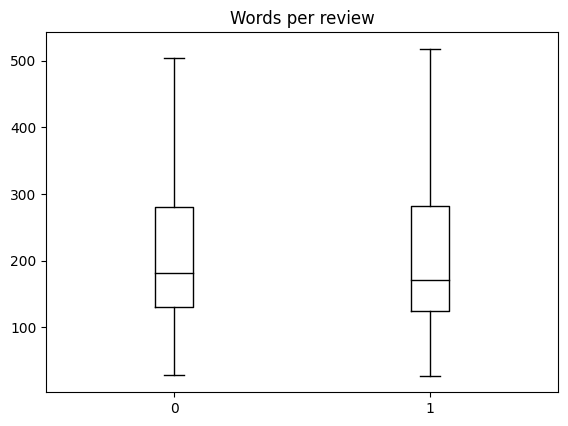

In [20]:
df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [21]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]

,text,label,Words per review
90,"Before Dogma 95: when Lars used movies as art, not just a story. A beautiful painting about love and death. This is one of my favorite movies of all time. The color... The music... Just perfect.",1,36
109,"""Foxes"" is a great film. The four young actresses Jodie Foster, Cherie Currie, Marilyn Kagan and Kandice Stroh are wonderful. The song ""On the radio"" by Donna Summer is lovely. A great film. *****",1,34
296,A movie best summed up by the scene where a victim simulates disembowelment by pulling some poor animal's intestines out from under her T-shirt. Too terrible for words.,0,28
301,Allison Dean's performance is what stands out in my mind watching this film. She balances out the melancholy tone of the film with an iridescent energy. I would like to see more of her.,1,34
772,"Brilliant execution in displaying once and for all, this time in the venue of politics, of how ""good intentions do actually pave the road to hell"". Excellent!",1,27
828,"This is actually one of my favorite films, I would recommend that EVERYONE watches it. There is some great acting in it and it shows that not all ""good"" films are American....",1,32
1519,"My favorite part of this film was the old man's attempt to cure his neighbor's ills by putting the strong medicine in his bath. There is more than a sense of family, there is a sense of community.",1,38


In [22]:
imdb.reset_format()

## Tokenizer

In [23]:
from transformers import AutoTokenizer

#checkpoint = "distilbert-base-cased"
checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [24]:
print(imdb_encoded['train'][0])

{'text': "This movie feels like a film project. As though the filmmakers picked out a cross section of society with no experience and got to work. Characters are kind of uninvolved and naive though. Despite this amateurish feel, the movie is effective. It's like a cross-section of life with neighborhood kids trying to realize or nurture their honest sexual feelings. Being raised by a grand-parent, of course from that generation there is shame associated with sexuality. This provides for some predictable but well done conflict. Probably most enjoyable was the way the main character grew a little bit in his Romantic relationship realizing a greater depth to sexual feelings. A good watch but nothing stirring....", 'label': 1, 'input_ids': [101, 1188, 2523, 5115, 1176, 170, 1273, 1933, 119, 1249, 1463, 1103, 18992, 3015, 1149, 170, 2771, 2237, 1104, 2808, 1114, 1185, 2541, 1105, 1400, 1106, 1250, 119, 23543, 1116, 1132, 1912, 1104, 8362, 1394, 19628, 1105, 22607, 1463, 119, 2711, 1142, 613

## Tiny IMDB

In [25]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDepthEstimation',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForImageToImage',
 'AutoModelForInstanceSegmentation',
 'AutoModelForMaskGeneration',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTextEncoding',
 'AutoModelForTextToSpectrogram',
 'AutoModelForTextToWaveform',
 'AutoModelForTokenClassification',
 'AutoModelForUniversalSegmentation',
 'AutoModelForVideoClassificat

In [26]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function, batched=True, batch_size=None)
tiny_imdb_encoded

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [28]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(tiny_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name, num_train_epochs=2, learning_rate=2e-5, per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
gradient_checkpointing_kwargs=None,
greater_is_better=None,
group_by_length=False,
half_precision_backend=

In [29]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss
1,0.717500,0.677891
2,0.676500,0.681414


In [30]:
preds = trainer.predict(tiny_imdb_encoded['test'])
preds

PredictionOutput(predictions=array([[0.18971501, 0.76583624],
       [0.06455313, 0.09978627],
       [0.1065625 , 0.33498076],
       [0.05212617, 0.09479862],
       [0.1262923 , 0.20296948],
       [0.10294122, 0.25826338],
       [0.14142615, 0.1258869 ],
       [0.13021426, 0.11078787],
       [0.06944267, 0.05484805],
       [0.06998488, 0.13620304]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0]), metrics={'test_loss': 0.7292745113372803, 'test_runtime': 0.3913, 'test_samples_per_second': 25.557, 'test_steps_per_second': 5.111})

In [31]:
preds.predictions.shape

(10, 2)

In [32]:
preds.predictions.argmax(axis=-1)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [44]:
preds.label_ids

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.4

In [35]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}


In [36]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  compute_metrics=get_accuracy,
                  args=training_args,
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.645100,0.704498,0.600000
2,0.640800,0.692035,0.500000


## Training run

In [37]:
batch_size = 8
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [38]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=get_accuracy,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.434800,0.367216,0.860000
2,0.174300,0.464992,0.875000


In [39]:


trainer.evaluate()

{'eval_loss': 0.46499213576316833,
 'eval_accuracy': 0.875,
 'eval_runtime': 13.2512,
 'eval_samples_per_second': 30.186,
 'eval_steps_per_second': 3.773,
 'epoch': 2.0}

In [40]:
trainer.save_model()

In [41]:
model_name

'bert-base-cased-finetuned-imdb'

In [42]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('This is not my idea of fun')

[{'label': 'LABEL_0', 'score': 0.5758140683174133}]

In [43]:
classifier('This was beyond incredible')

[{'label': 'LABEL_1', 'score': 0.9711271524429321}]